To illustrate the use of Eigenvalue decomposition for visualization.
    
    
    

In [9]:
#importing required libraries

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from scipy import linalg as la

import warnings
warnings.filterwarnings("ignore") 

### CONTEXT OF THE DATASET

This dataset contain information related to real estate properties.
Total Entries: 2919
Columns (Features): 81
These columns represent various attributes or characteristics of the properties.

In [11]:
#reading the train data 

In [14]:
train_data=pd.read_csv('train.csv')

In [15]:
#checking for the shape of the train data
train_data.shape

(1460, 81)

In [17]:
#reading the test data
test_data=pd.read_csv('test.csv')

In [18]:
#checking for the shape of test data
test_data.shape

(1459, 80)

In [19]:
#concating the train and test data
data=pd.concat([train_data,test_data])

In [20]:
#checking for the shape of the concatinated data
data.shape

(2919, 81)

In [21]:
#checking for the data information
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2915 non-null   object 
 3   LotFrontage    2433 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          198 non-null    object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2917 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   int64  
 18  OverallC

In [22]:
#Observation 

#There are 2919 rows and 81 columns
#The columns are mix of categorical and numerical
#The label column is Saleprice

#There are null values in the dataset.

In [23]:
#selecting all the numerical columns
data.select_dtypes('number')

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706.0,...,0,61,0,0,0,0,0,2,2008,208500.0
1,2,20,80.0,9600,6,8,1976,1976,0.0,978.0,...,298,0,0,0,0,0,0,5,2007,181500.0
2,3,60,68.0,11250,7,5,2001,2002,162.0,486.0,...,0,42,0,0,0,0,0,9,2008,223500.0
3,4,70,60.0,9550,7,5,1915,1970,0.0,216.0,...,0,35,272,0,0,0,0,2,2006,140000.0
4,5,60,84.0,14260,8,5,2000,2000,350.0,655.0,...,192,84,0,0,0,0,0,12,2008,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,21.0,1936,4,7,1970,1970,0.0,0.0,...,0,0,0,0,0,0,0,6,2006,NaN
1455,2916,160,21.0,1894,4,5,1970,1970,0.0,252.0,...,0,24,0,0,0,0,0,4,2006,NaN
1456,2917,20,160.0,20000,5,7,1960,1996,0.0,1224.0,...,474,0,0,0,0,0,0,9,2006,NaN
1457,2918,85,62.0,10441,5,5,1992,1992,0.0,337.0,...,80,32,0,0,0,0,700,7,2006,NaN


In [24]:
#inference: there are 38 numerical columns including label(SalePrice)

### Univariate Analysis of Numerical columns

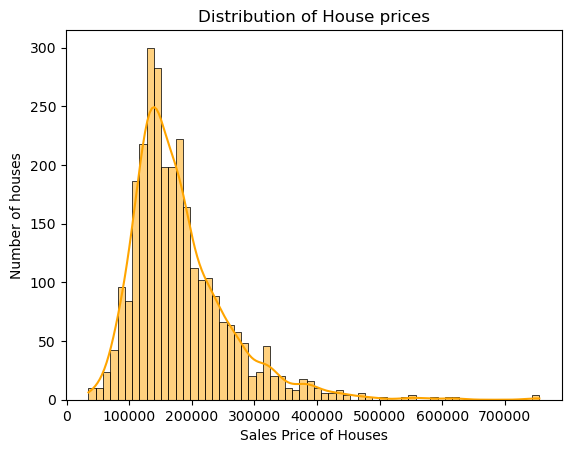

In [25]:
#checking for the distribution of the house price using histogram plot
sns.histplot(data = data,x = 'SalePrice',kde = True,color = 'Orange')
plt.title("Distribution of House prices")
plt.xlabel("Sales Price of Houses")
plt.ylabel('Number of houses')
plt.show()

In [26]:
#Observation:

#The distribution of the saleprice is near to normal with right skewed data. 

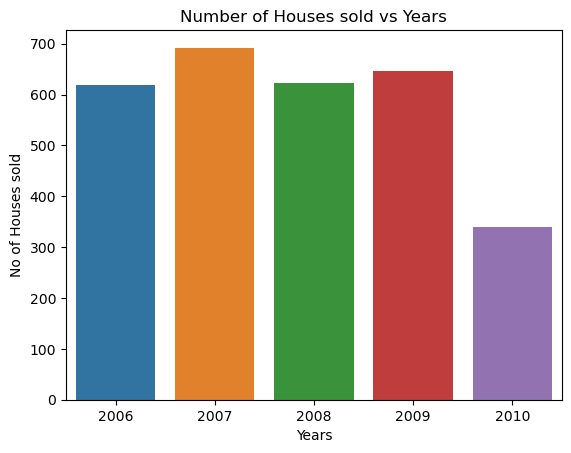

In [27]:
#checking for the no of houses sold over the years using count plot
sns.countplot(data = data,x = 'YrSold')
plt.xlabel("Years")
plt.ylabel("No of Houses sold")
plt.title("Number of Houses sold vs Years")
plt.show()

In [28]:
#Observation:

#year 2010 has seen lesser number houses sold

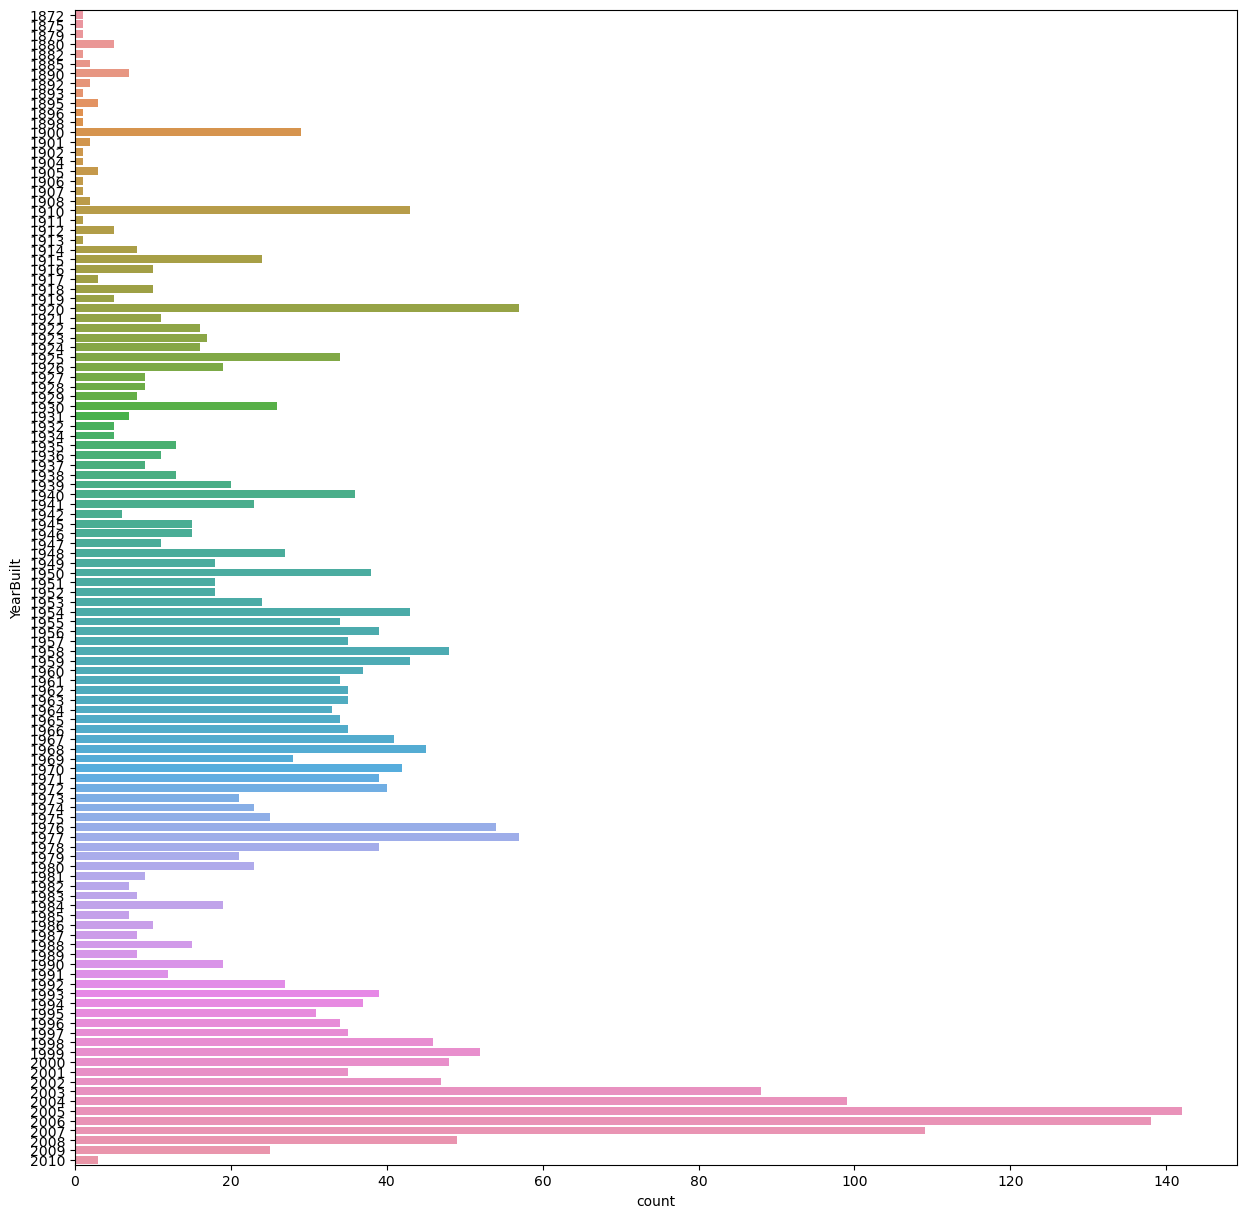

In [29]:
#checking for the number of houses built in each year
plt.figure(figsize = (15,15))
sns.countplot(data = data,y = 'YearBuilt')
plt.show()

In [30]:
#Observation

#year 2004 has seen more number of houses built

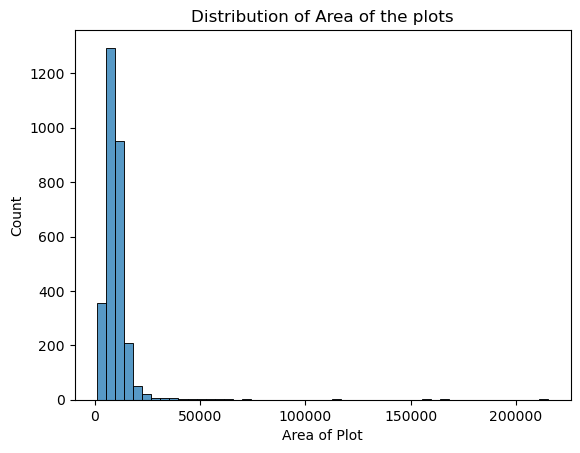

In [31]:
#checking for the distribution of lot area
sns.histplot(data = data,x = 'LotArea',bins=50)
plt.title("Distribution of Area of the plots")
plt.xlabel("Area of Plot")
plt.show()

In [32]:
#Observation:

#The data of the area distribution is right skewed with outliers

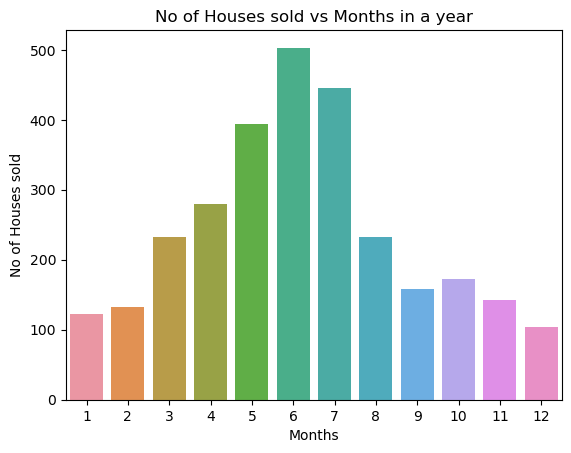

In [33]:
#checking for total number of houses sold in each month over the years
sns.countplot(data = data,x='MoSold')
plt.title("No of Houses sold vs Months in a year")
plt.xlabel("Months")
plt.ylabel("No of Houses sold")
plt.show()

In [34]:
#Observation:

#The month June has more demand of houses while the december has seen the lowest demand

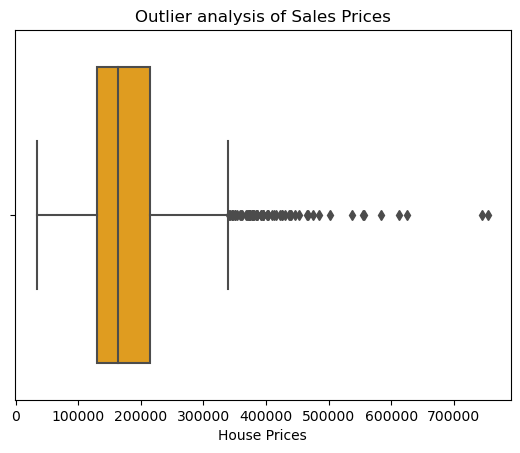

In [35]:
#checking for the outlier in the sales price using box plot
sns.boxplot(data = data,x = 'SalePrice',color = 'Orange')
plt.xlabel('House Prices')
plt.title('Outlier analysis of Sales Prices')
plt.show()

In [36]:
#Observation

#The salesprice column has outliers

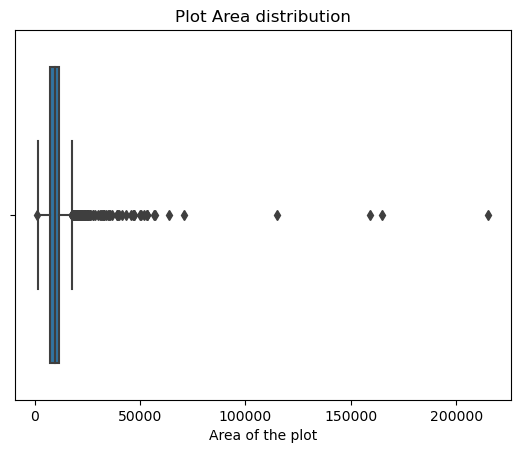

In [37]:
#checking for the outlier in the LotArea using box plot
sns.boxplot(data = data,x ='LotArea')
plt.xlabel('Area of the plot')
plt.title('Plot Area distribution')
plt.show()

In [38]:
#Observations

#There are outliers in lot area

### Bivariate analysis of Numerical Columns

In [39]:
#to select columns in a dataset that have numeric data types. 
data.select_dtypes('number').columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

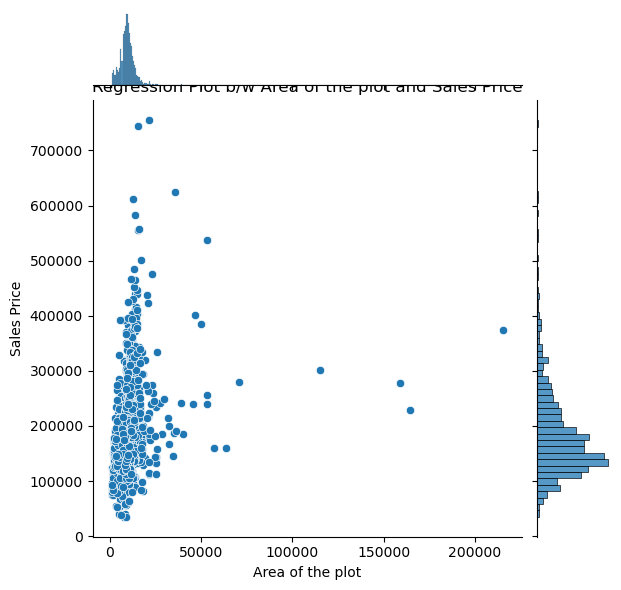

In [40]:
#to create a joint plot between the 'LotArea' and 'SalePrice' columns of dataset. 
#This plot will display the relationship between these two variables.
sns.jointplot(data = data,x = 'LotArea',y = 'SalePrice')
plt.xlabel('Area of the plot')
plt.ylabel('Sales Price')
plt.title('Regression Plot b/w Area of the plot and Sales Price')
plt.show()

In [41]:
#There is weak positive correlation between in the Lot area and Salesprices

In [42]:
#to calculate the correlation matrix for the numerical columns in the dataset. This matrix shows the pairwise correlations between different numerical variables. 
data.select_dtypes('number').corr()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.008931,-0.027549,-0.040746,-0.029771,-0.002839,-0.016581,-0.050438,-0.025219,-0.016947,...,-0.007056,0.009960,0.021609,-0.046538,0.022208,0.014332,0.008244,0.006448,-0.256050,-0.021917
MSSubClass,0.008931,1.000000,-0.417359,-0.201730,0.033638,-0.065625,0.034409,0.043315,0.005433,-0.064311,...,-0.017654,-0.015923,-0.020867,-0.037529,-0.049181,-0.003080,-0.028867,-0.001231,-0.015028,-0.084284
LotFrontage,-0.027549,-0.417359,1.000000,0.489896,0.217645,-0.075508,0.122811,0.091557,0.221079,0.219408,...,0.122070,0.164896,0.011509,0.028289,0.075858,0.174119,0.044272,0.011254,-0.007917,0.351799
LotArea,-0.040746,-0.201730,0.489896,1.000000,0.100541,-0.035617,0.024128,0.021612,0.125596,0.194031,...,0.158045,0.104797,0.020974,0.015995,0.054375,0.093708,0.069029,0.004156,-0.024234,0.263843
OverallQual,-0.029771,0.033638,0.217645,0.100541,1.000000,-0.093847,0.597554,0.571532,0.432947,0.281810,...,0.255317,0.298084,-0.139256,0.018715,0.042910,0.030740,0.005562,0.030405,-0.019614,0.790982
OverallCond,-0.002839,-0.065625,-0.075508,-0.035617,-0.093847,1.000000,-0.368477,0.047654,-0.136007,-0.050418,...,0.020123,-0.068978,0.071044,0.043739,0.043713,-0.016876,0.033956,-0.006256,0.030102,-0.077856
YearBuilt,-0.016581,0.034409,0.122811,0.024128,0.597554,-0.368477,1.000000,0.612235,0.314051,0.279581,...,0.229426,0.198554,-0.374073,0.015958,-0.041046,0.002304,-0.010886,0.013938,-0.012344,0.522897
YearRemodAdd,-0.050438,0.043315,0.091557,0.021612,0.571532,0.047654,0.612235,1.000000,0.196875,0.152126,...,0.218513,0.242182,-0.220456,0.037433,-0.046878,-0.011407,-0.003124,0.017693,0.033203,0.507101
MasVnrArea,-0.025219,0.005433,0.221079,0.125596,0.432947,-0.136007,0.314051,0.196875,1.000000,0.303490,...,0.166200,0.144650,-0.111499,0.013612,0.065209,0.004512,0.044811,-0.000117,-0.018510,0.477493
BsmtFinSF1,-0.016947,-0.064311,0.219408,0.194031,0.281810,-0.050418,0.279581,0.152126,0.303490,1.000000,...,0.223492,0.124163,-0.099712,0.050908,0.096823,0.084462,0.093295,-0.000942,0.022556,0.386420


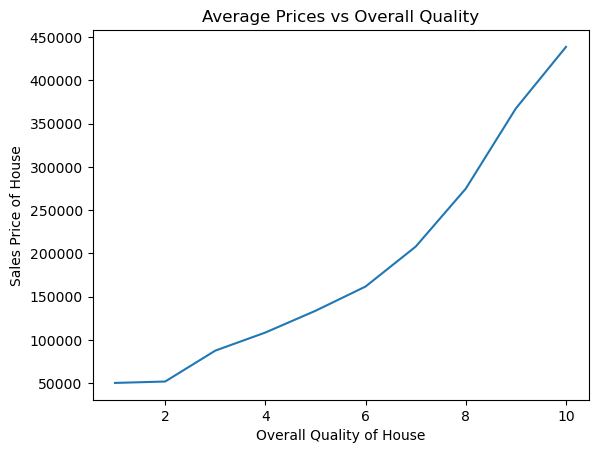

In [43]:
#to visualize the relationship between the 'OverallQual' and 'SalePrice' columns in dataset using line plot
data['SalePrice'].groupby(data['OverallQual']).mean().plot(kind='line')
plt.xlabel('Overall Quality of House')
plt.ylabel('Sales Price of House')
plt.title("Average Prices vs Overall Quality")
plt.show()

In [44]:
#Observation:
#There is positive relation between the overall quality and salesprice of the house

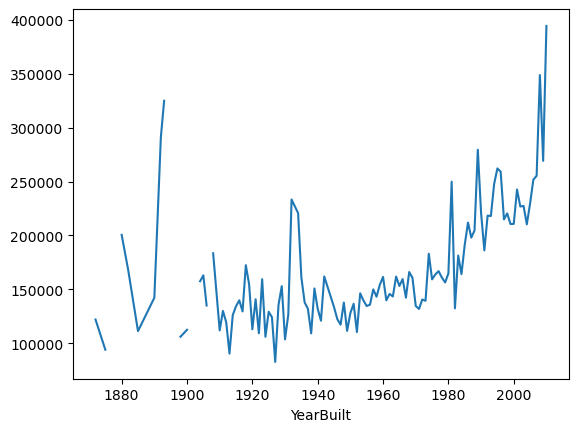

In [45]:
#to illustrate the relationship between the 'YearBuilt' and the average 'SalePrice' of houses in dataset. 
data['SalePrice'].groupby(data['YearBuilt']).mean().plot(kind = 'line')
plt.show()

In [46]:
#Observation

#Newly constructed houses has higher average prices when compared with the older houses

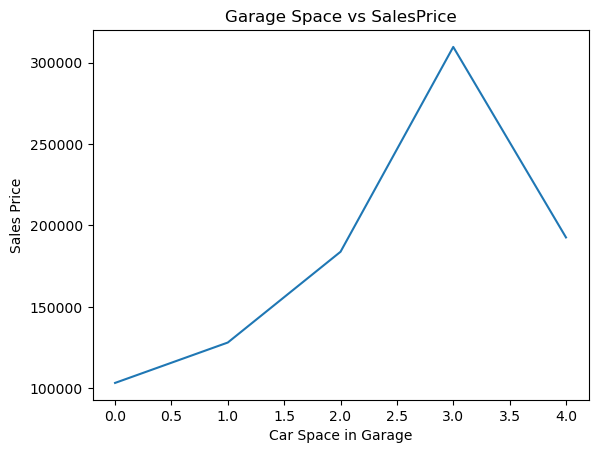

In [47]:
#to depict the relationship between the 'GarageCars' (number of cars that can fit in the garage) and the average 'SalePrice' of houses in dataset.
data['SalePrice'].groupby(data['GarageCars']).mean().plot(kind = 'line')
plt.xlabel('Car Space in Garage')
plt.ylabel('Sales Price')
plt.title('Garage Space vs SalesPrice')
plt.show()

In [48]:
#Observation

#The Salesprice of house is more for a house more no of car spaces in the garage. But the average value of the house drops 4 no car spaces

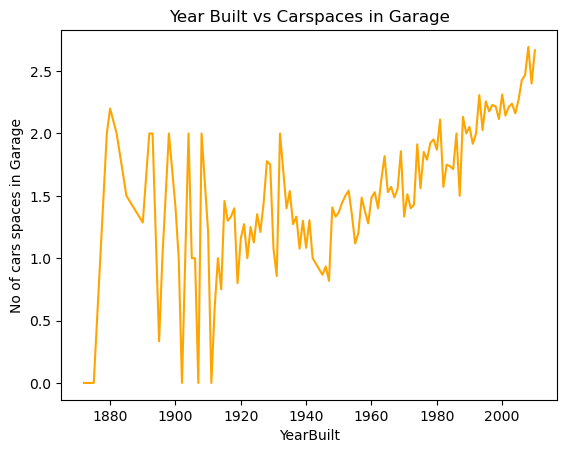

In [49]:
#This visualization provides insights into how the average garage capacity has changed over the years based on the construction year of the houses.
data['GarageCars'].groupby(data['YearBuilt']).mean().plot(kind = 'line',color = 'orange')
plt.ylabel('No of cars spaces in Garage')
plt.title('Year Built vs Carspaces in Garage')
plt.show()

In [50]:
#Observation

#The car spaces for the recently constructed houses has more when compared with the older houses

### Multivariate analysis of Numerical Columns

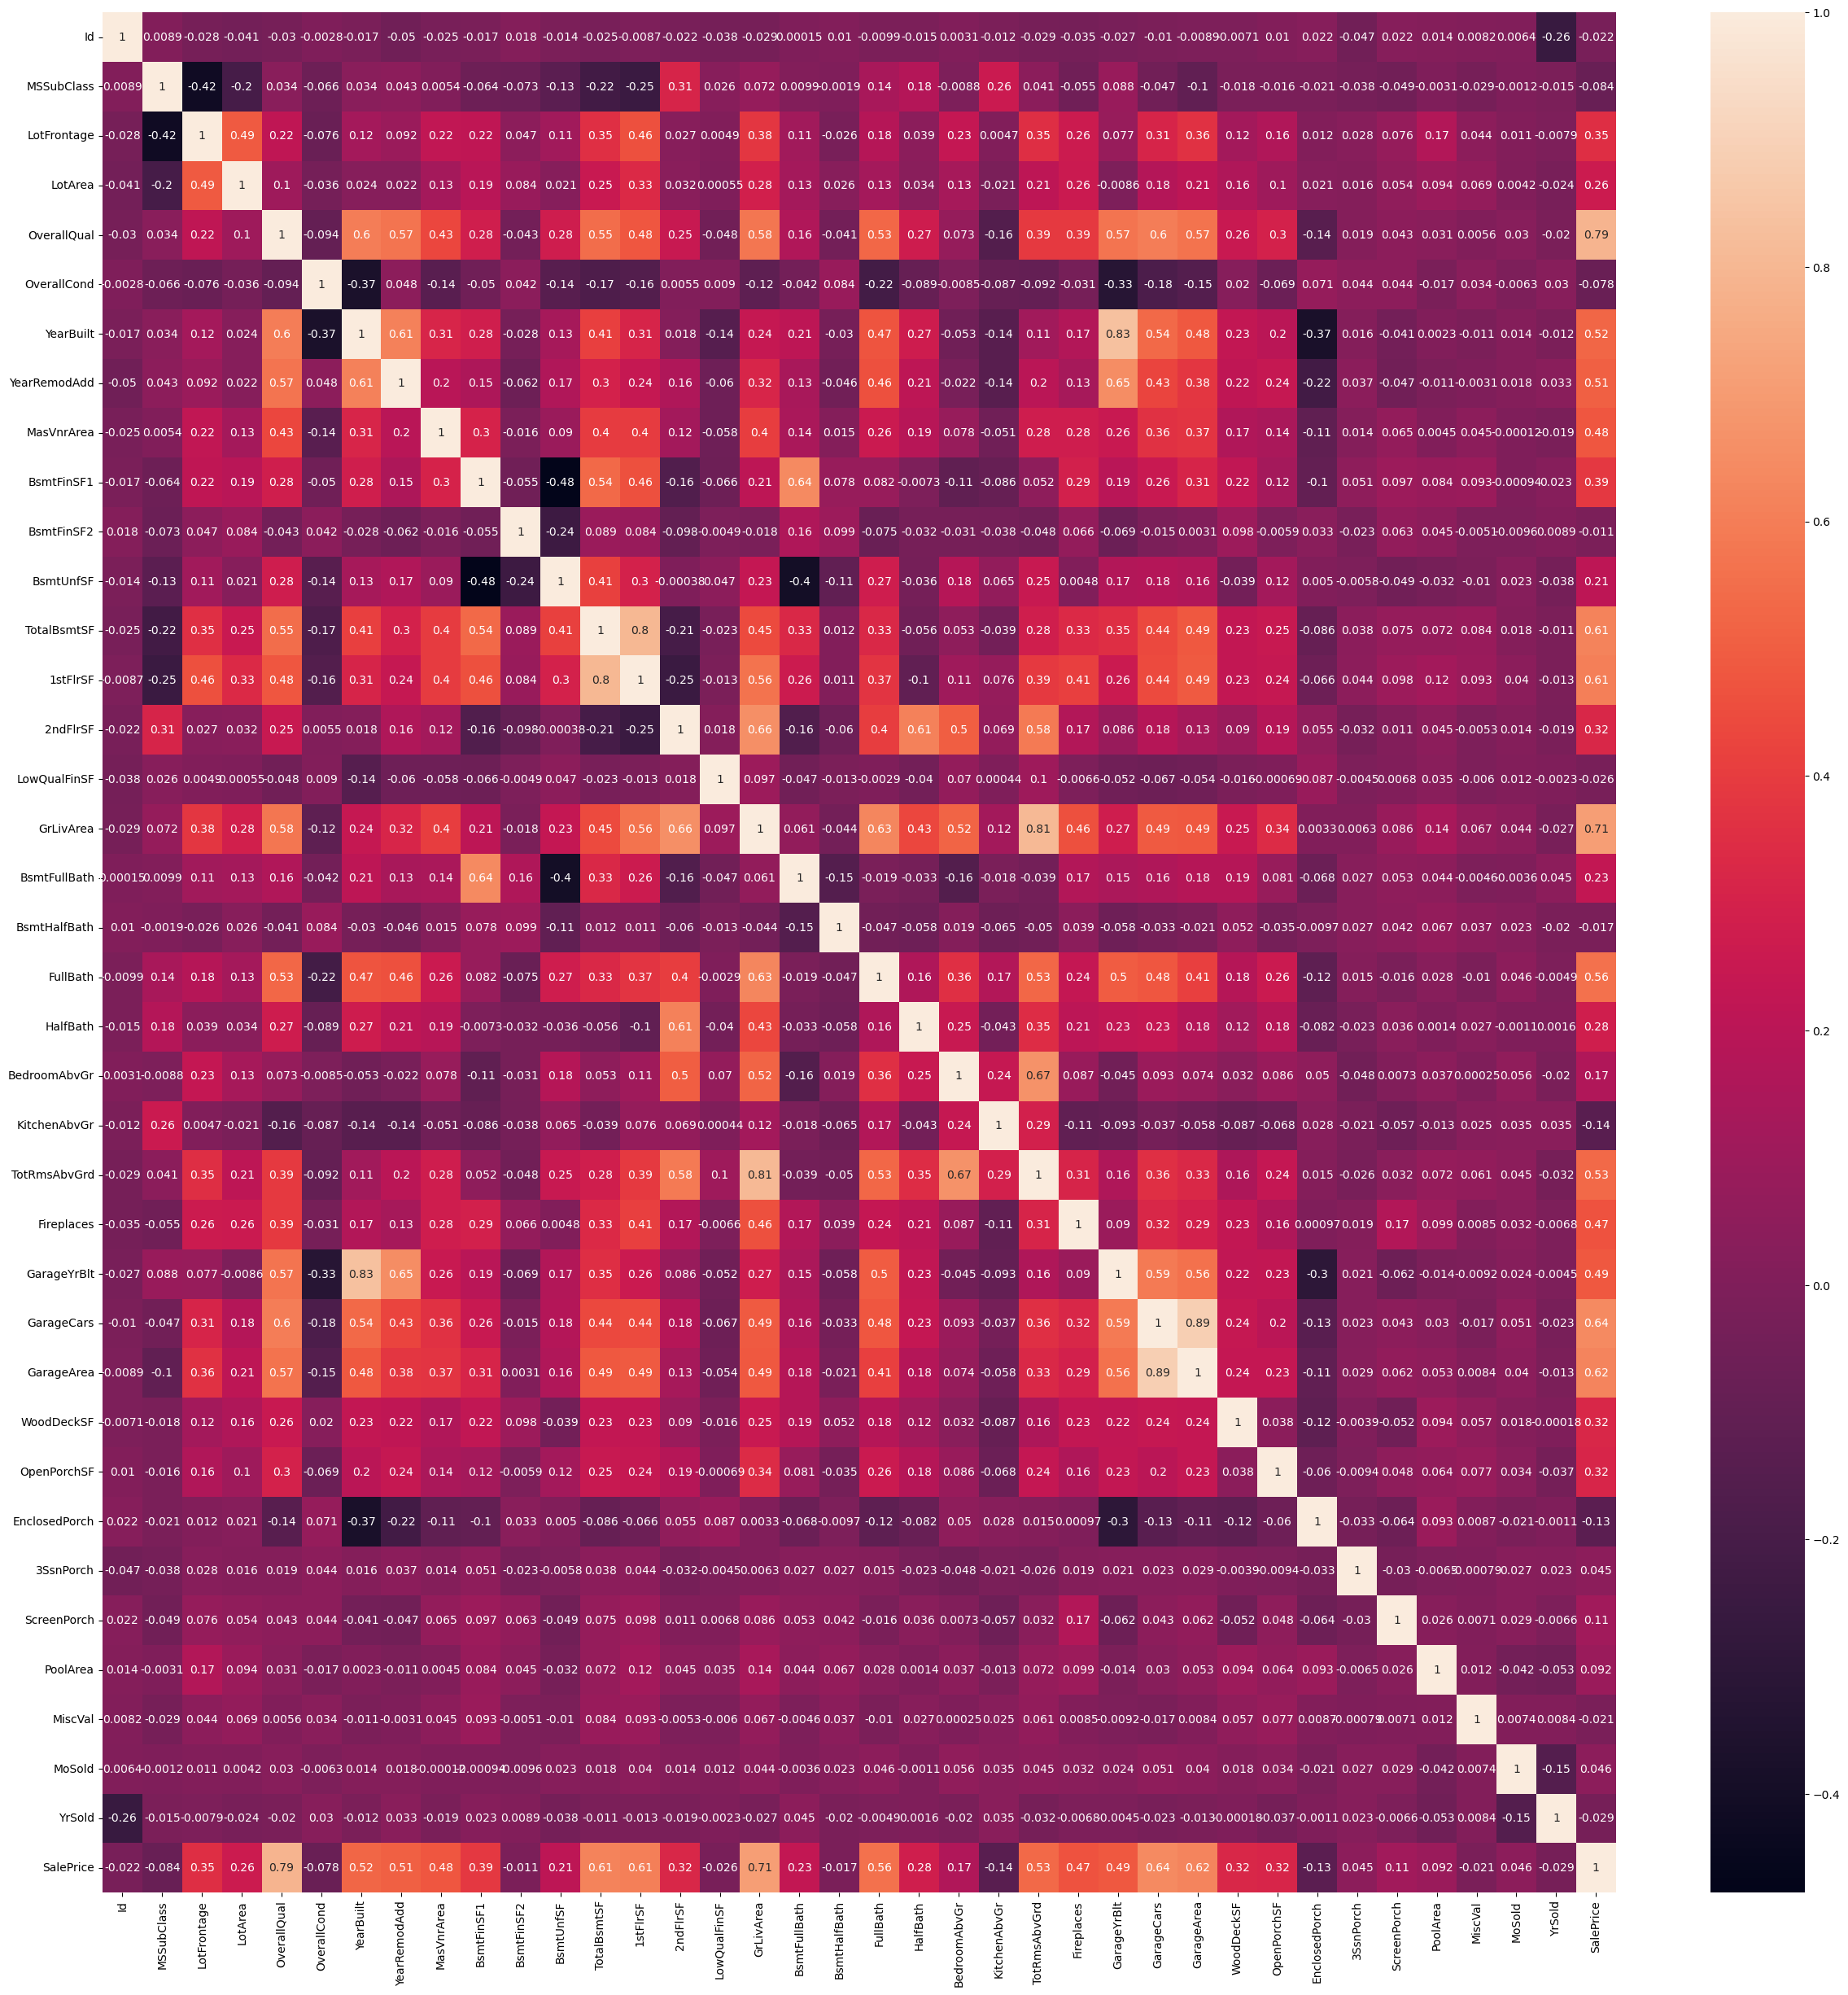

In [51]:
#understanding the relationships between different numerical variables in your dataset.
plt.figure(figsize = (30,30))
sns.heatmap(data  = data.select_dtypes('number').corr(),annot = True)
plt.show()

In [52]:
#Observation

#The sales price of the house has strong correlation with the Overall quality and medium correlation with the year built,year remodelled,Total basement area etc

In [53]:
#to create DataFrame that will only contain columns with object data types.
data_cat = data.select_dtypes('object')
data_cat.head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [54]:
#inference: There are 43 categorical columns

### Value Count Analysis of categorical columns

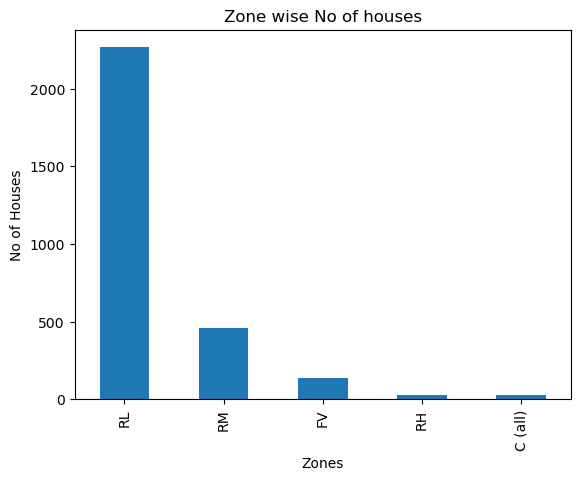

In [55]:
#to create a bar plot to visualize the distribution of houses across different zones 
data_cat['MSZoning'].value_counts().plot(kind = 'bar')
plt.xlabel('Zones')
plt.ylabel('No of Houses')
plt.title('Zone wise No of houses')
plt.show()

In [56]:
#Observation

#The dataset has more RL zones houses

<Axes: >

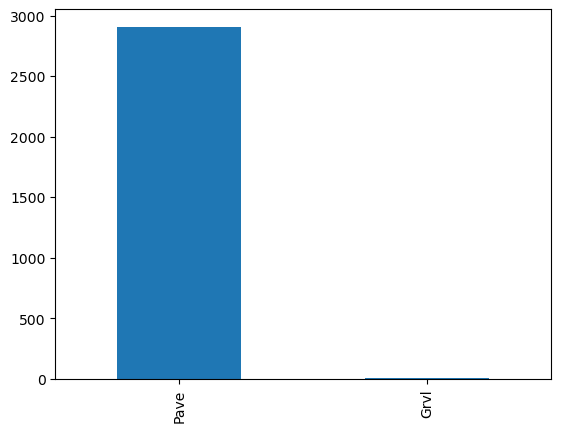

In [57]:
#creating a bar plot to visualize the distribution of different street types 
data_cat['Street'].value_counts().plot(kind = 'bar')

In [58]:
#Observation

#Almost 99% houses has paved streets

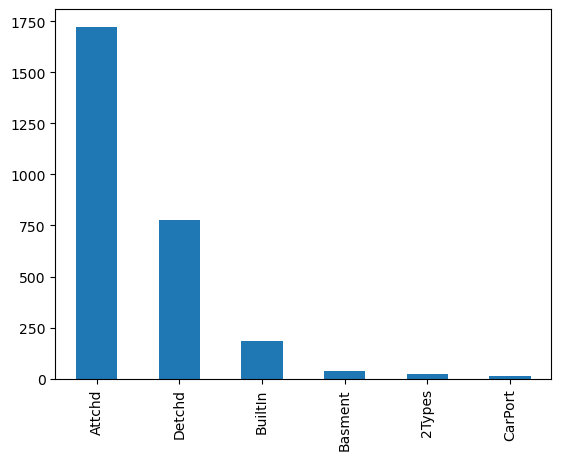

In [59]:
#to create a bar plot to visualize the distribution of different garage types
data_cat['GarageType'].value_counts().plot(kind = 'bar')
plt.show()

In [60]:
#Observations

#95% of the houses has the attached garage

<Axes: xlabel='GarageType'>

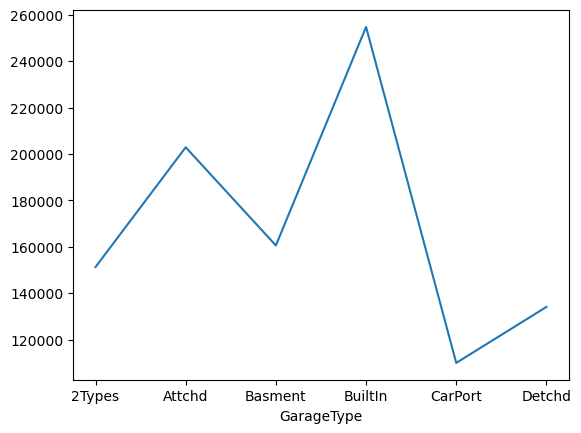

In [61]:
#to understand how the type of garage is related to the average sale price of houses.
data['SalePrice'].groupby(data['GarageType']).mean().plot(kind  = 'line')

In [62]:
#Observation

#The house with builtin garage is pricier when compared with the houses with other types of garages

<Axes: xlabel='LotShape'>

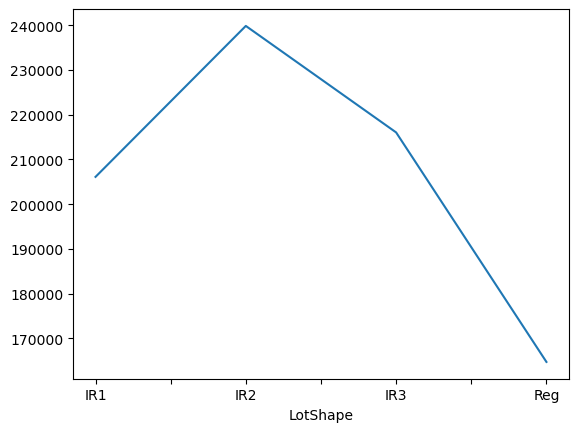

In [63]:
#To visualize how the average sale price varies with different lot shapes.
data['SalePrice'].groupby(data['LotShape']).mean().plot(kind = 'line')

In [64]:
#Observation

#IR2 shaped plots are pricier than the other plots

<Axes: xlabel='LotArea', ylabel='SalePrice'>

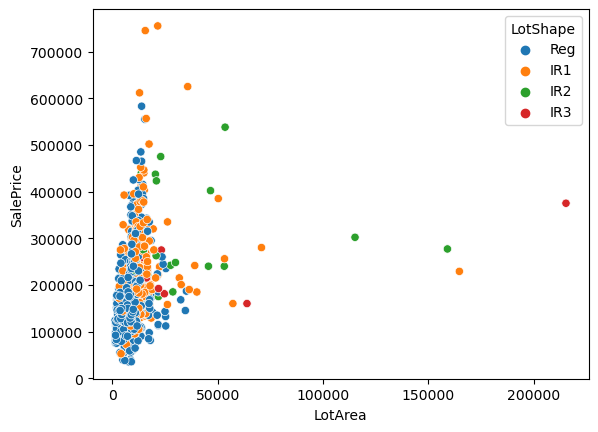

In [65]:
# to check relation between the lot area, sale price, and how different lot shapes are distributed within the dataset.
sns.scatterplot(data = data,x = 'LotArea',y ='SalePrice',hue = 'LotShape')

In [66]:
#Observation

#The IR1 plot is more pricier for the same area when compared with regular plot

### Data Preprocessing

In [67]:
#to create a list that will include the names of columns where data is incomplete or unavailable.
data_null_cols = data.columns[data.isnull().any()].tolist()

In [68]:
#calculates the percentage of missing values in each column of the dataset that contains null values then sorting these percentages in descending order.
data[data_null_cols].isnull().mean().sort_values(ascending=False)*100

PoolQC          99.657417
MiscFeature     96.402878
Alley           93.216855
Fence           80.438506
SalePrice       49.982871
FireplaceQu     48.646797
LotFrontage     16.649538
GarageCond       5.447071
GarageYrBlt      5.447071
GarageFinish     5.447071
GarageQual       5.447071
GarageType       5.378554
BsmtExposure     2.809181
BsmtCond         2.809181
BsmtQual         2.774923
BsmtFinType2     2.740665
BsmtFinType1     2.706406
MasVnrType       0.822199
MasVnrArea       0.787941
MSZoning         0.137033
Functional       0.068517
BsmtHalfBath     0.068517
BsmtFullBath     0.068517
Utilities        0.068517
KitchenQual      0.034258
TotalBsmtSF      0.034258
BsmtUnfSF        0.034258
GarageCars       0.034258
GarageArea       0.034258
BsmtFinSF2       0.034258
BsmtFinSF1       0.034258
Exterior2nd      0.034258
Exterior1st      0.034258
SaleType         0.034258
Electrical       0.034258
dtype: float64

In [69]:
# we can drop Alley,FireplaceQu,PoolQC,Fence,MiscFeature as nearly 50% or more values are missing
data=data.drop(['Alley','PoolQC','FireplaceQu','Fence','MiscFeature','LotArea'],axis=1)

In [70]:
#to find the number of unique values in each column of the dataset data, and then sorts these counts in descending order.
data.nunique().sort_values(ascending = False)

Id              2919
GrLivArea       1292
BsmtUnfSF       1135
1stFlrSF        1083
TotalBsmtSF     1058
                ... 
BsmtHalfBath       3
LandSlope          3
Street             2
CentralAir         2
Utilities          2
Length: 75, dtype: int64

In [71]:
#inference: as Id has only unique values we can drop the column

In [72]:
data=data.drop(['Id'],axis=1)

In [73]:
#to provides a list of columns along with the respective counts of missing values, ordered from the column with the highest count of missing values to the lowest.
data_null_cols = data.columns[data.isnull().any()].tolist()
data[data_null_cols].isnull().sum().sort_values(ascending = False)

SalePrice       1459
LotFrontage      486
GarageCond       159
GarageQual       159
GarageFinish     159
GarageYrBlt      159
GarageType       157
BsmtCond          82
BsmtExposure      82
BsmtQual          81
BsmtFinType2      80
BsmtFinType1      79
MasVnrType        24
MasVnrArea        23
MSZoning           4
BsmtFullBath       2
BsmtHalfBath       2
Functional         2
Utilities          2
BsmtUnfSF          1
Electrical         1
KitchenQual        1
BsmtFinSF2         1
BsmtFinSF1         1
Exterior2nd        1
GarageCars         1
GarageArea         1
Exterior1st        1
SaleType           1
TotalBsmtSF        1
dtype: int64

In [74]:
# creating a list of categorical columns with null values
cat_cols=data.select_dtypes('object').columns.tolist()
cat_cols_null=[]
for i in cat_cols:
    if data[i].isnull().sum()>0:
        cat_cols_null.append(i)
        print(i,':',data[i].isnull().sum())

MSZoning : 4
Utilities : 2
Exterior1st : 1
Exterior2nd : 1
MasVnrType : 24
BsmtQual : 81
BsmtCond : 82
BsmtExposure : 82
BsmtFinType1 : 79
BsmtFinType2 : 80
Electrical : 1
KitchenQual : 1
Functional : 2
GarageType : 157
GarageFinish : 159
GarageQual : 159
GarageCond : 159
SaleType : 1


In [75]:
#numerical columns has both discrete and continous columns.

In [76]:
num_cols=data.select_dtypes('number').columns.tolist()
num_cols.remove('SalePrice')
num_cols

['MSSubClass',
 'LotFrontage',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold']

In [77]:
discrete_cols=[col for col in num_cols if data[col].nunique()<=25]
discrete_cols

['MSSubClass',
 'OverallQual',
 'OverallCond',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 'PoolArea',
 'MoSold',
 'YrSold']

In [78]:
continous_cols=[col for col in num_cols if col not in discrete_cols]
continous_cols

['LotFrontage',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'GarageYrBlt',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'MiscVal']

In [79]:
#missing values in discrete numerical columns:
num_cols_null=[]
for i in discrete_cols:
    if data[i].isnull().sum()>0:
        print(i,':',data[i].isnull().sum())
        num_cols_null.append(i) 

BsmtFullBath : 2
BsmtHalfBath : 2
GarageCars : 1


In [80]:
#imputing missing values in discrete numerical columns:
for i in discrete_cols:
    data[i].fillna(data[i].mode().values[0], inplace=True)

In [81]:
#missing values in continous numerical columns:
num_cols_null=[]
for i in continous_cols:
    if data[i].isnull().sum()>0:
        print(i,':',data[i].isnull().sum())
        num_cols_null.append(i)   

LotFrontage : 486
MasVnrArea : 23
BsmtFinSF1 : 1
BsmtFinSF2 : 1
BsmtUnfSF : 1
TotalBsmtSF : 1
GarageYrBlt : 159
GarageArea : 1


In [82]:
#imputing missing values in continous numerical columns:
for i in continous_cols:
    if data[i].skew()>2 and data[i].skew()<-2:
        data[i].fillna(data[i].mean(), inplace=True)
    else:
        data[i].fillna(data[i].median(), inplace=True)

In [83]:
data.head()

,MSSubClass,MSZoning,LotFrontage,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,...,0,0,0,0,0,2,2008,WD,Normal,208500.0
1,20,RL,80.0,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,...,0,0,0,0,0,5,2007,WD,Normal,181500.0
2,60,RL,68.0,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,...,0,0,0,0,0,9,2008,WD,Normal,223500.0
3,70,RL,60.0,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,...,272,0,0,0,0,2,2006,WD,Abnorml,140000.0
4,60,RL,84.0,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,...,0,0,0,0,0,12,2008,WD,Normal,250000.0


In [84]:
#selecting a specific set of numeric columns based on their correlation with 'SalePrice', and adding a predefined set of categorical columns.
#Then we are subsetting the original data to include only these important columns.
#This can be useful for further analysis or modeling.

In [85]:
important_num_cols = list(data.select_dtypes('number').corr()["SalePrice"][(data.select_dtypes('number').corr()["SalePrice"]>0.5) | (data.select_dtypes('number').corr()["SalePrice"]<-0.20)].index)
cat_cols = ["MSZoning", "Utilities","BldgType","Heating","KitchenQual","SaleCondition","LandSlope"]
important_cols = important_num_cols + cat_cols

data = data[important_cols]
data.head()

,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageCars,GarageArea,SalePrice,MSZoning,Utilities,BldgType,Heating,KitchenQual,SaleCondition,LandSlope
0,7,2003,2003,856.0,856,1710,2,8,2.0,548.0,208500.0,RL,AllPub,1Fam,GasA,Gd,Normal,Gtl
1,6,1976,1976,1262.0,1262,1262,2,6,2.0,460.0,181500.0,RL,AllPub,1Fam,GasA,TA,Normal,Gtl
2,7,2001,2002,920.0,920,1786,2,6,2.0,608.0,223500.0,RL,AllPub,1Fam,GasA,Gd,Normal,Gtl
3,7,1915,1970,756.0,961,1717,1,7,3.0,642.0,140000.0,RL,AllPub,1Fam,GasA,Gd,Abnorml,Gtl
4,8,2000,2000,1145.0,1145,2198,2,9,3.0,836.0,250000.0,RL,AllPub,1Fam,GasA,Gd,Normal,Gtl


In [86]:
data.head(2)

,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageCars,GarageArea,SalePrice,MSZoning,Utilities,BldgType,Heating,KitchenQual,SaleCondition,LandSlope
0,7,2003,2003,856.0,856,1710,2,8,2.0,548.0,208500.0,RL,AllPub,1Fam,GasA,Gd,Normal,Gtl
1,6,1976,1976,1262.0,1262,1262,2,6,2.0,460.0,181500.0,RL,AllPub,1Fam,GasA,TA,Normal,Gtl


In [87]:
data_num=data.select_dtypes('number')

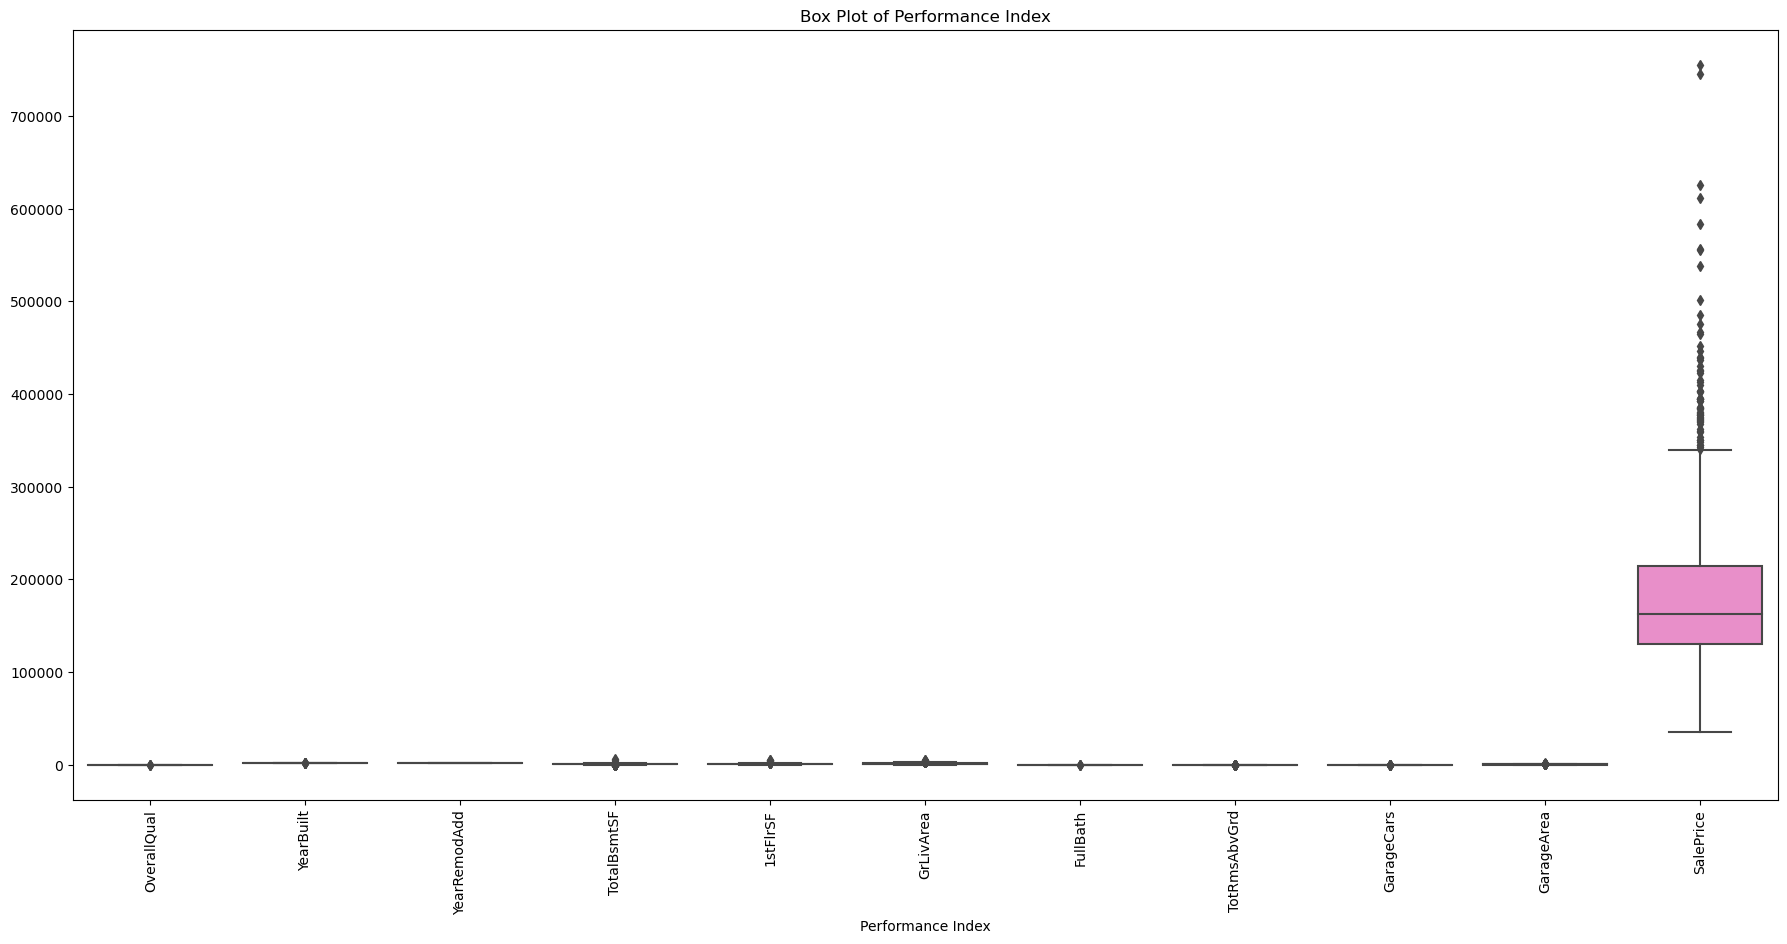

In [88]:
#checking for outliers
plt.figure(figsize=(22, 10))

sns.boxplot(data_num)
plt.title('Box Plot of Performance Index')
plt.xlabel('Performance Index')
plt.xticks(rotation=90)


plt.show()

In [89]:
#removing outliers
data_num=data.select_dtypes('number').drop('SalePrice',axis=1)
Q1 = data_num.quantile(0.25)
Q3 = data_num.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
data.shape

(2919, 18)

In [90]:
# removing outliers
data = data[~((data_num < lower_bound) | (data_num > upper_bound)).any(axis=1)]

In [91]:
data_num=data.select_dtypes('number')

In [92]:
data_num=data.select_dtypes('number').drop('SalePrice',axis=1)
Q1 = data_num.quantile(0.25)
Q3 = data_num.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
data.shape

(2661, 18)

In [93]:
#removing outliers
data = data[~((data_num < lower_bound) | (data_num > upper_bound)).any(axis=1)]

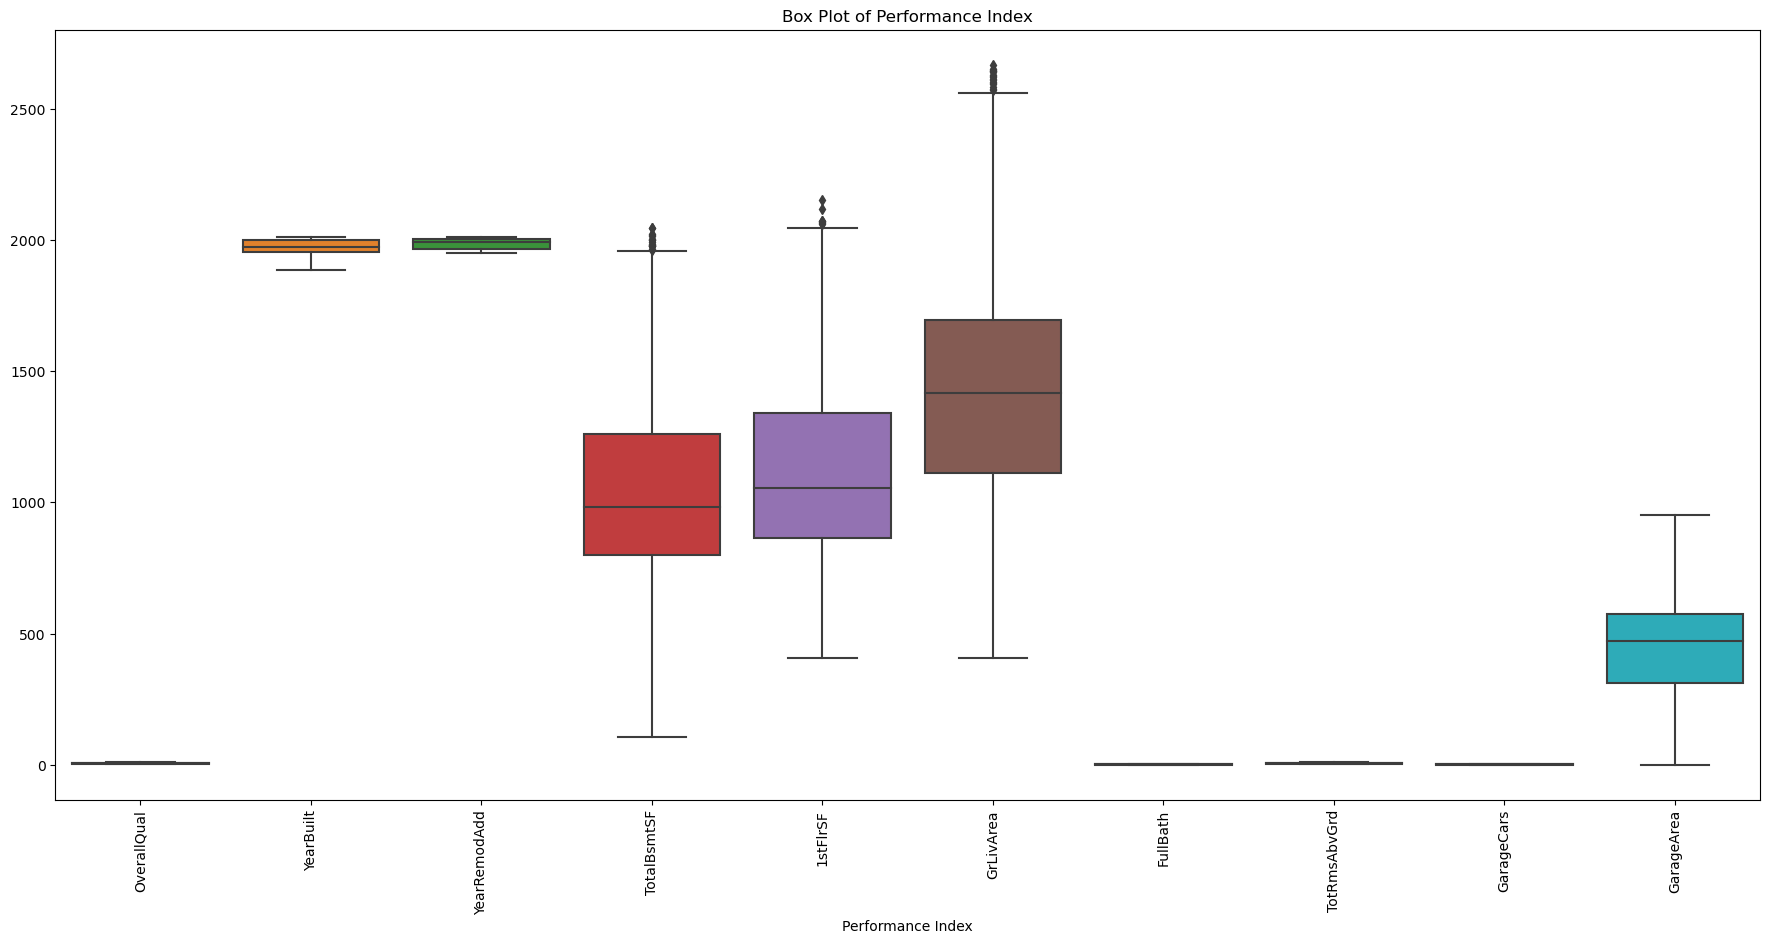

In [94]:
#checking for outliers
plt.figure(figsize=(22, 10))

sns.boxplot(data_num)
plt.title('Box Plot of Performance Index')
plt.xlabel('Performance Index')
plt.xticks(rotation=90)


plt.show()

In [95]:
data.shape

(2623, 18)

In [96]:
data.head()

,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageCars,GarageArea,SalePrice,MSZoning,Utilities,BldgType,Heating,KitchenQual,SaleCondition,LandSlope
0,7,2003,2003,856.0,856,1710,2,8,2.0,548.0,208500.0,RL,AllPub,1Fam,GasA,Gd,Normal,Gtl
1,6,1976,1976,1262.0,1262,1262,2,6,2.0,460.0,181500.0,RL,AllPub,1Fam,GasA,TA,Normal,Gtl
2,7,2001,2002,920.0,920,1786,2,6,2.0,608.0,223500.0,RL,AllPub,1Fam,GasA,Gd,Normal,Gtl
3,7,1915,1970,756.0,961,1717,1,7,3.0,642.0,140000.0,RL,AllPub,1Fam,GasA,Gd,Abnorml,Gtl
4,8,2000,2000,1145.0,1145,2198,2,9,3.0,836.0,250000.0,RL,AllPub,1Fam,GasA,Gd,Normal,Gtl


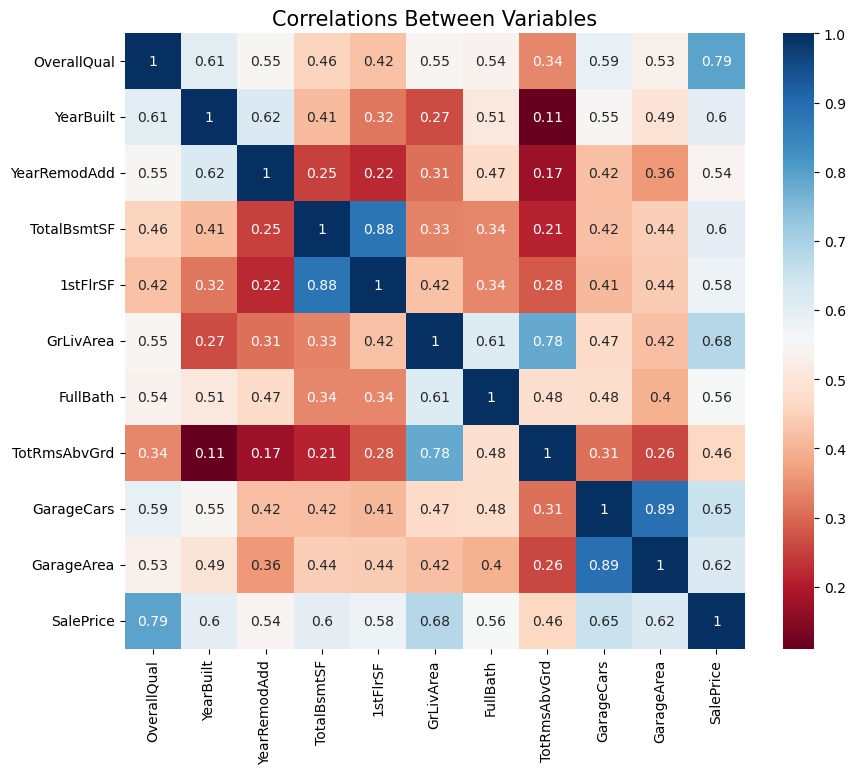

In [97]:
plt.figure(figsize=(10,8))
sns.heatmap(data.select_dtypes('number').corr(), cmap="RdBu",annot=True)
plt.title("Correlations Between Variables", size=15)
plt.show()

In [98]:
data.shape
data.dropna(inplace = True)

In [99]:
data.select_dtypes('number').isnull().sum()

OverallQual     0
YearBuilt       0
YearRemodAdd    0
TotalBsmtSF     0
1stFlrSF        0
GrLivArea       0
FullBath        0
TotRmsAbvGrd    0
GarageCars      0
GarageArea      0
SalePrice       0
dtype: int64

In [100]:
ss= StandardScaler()
data_num=data.select_dtypes('number')
data_num=data_num.drop(['SalePrice'],axis=1)
data_scaled=ss.fit_transform(data_num)
data_scaled=pd.DataFrame(data_scaled,columns=data_num.columns)

In [101]:
data_num.isna().sum()

OverallQual     0
YearBuilt       0
YearRemodAdd    0
TotalBsmtSF     0
1stFlrSF        0
GrLivArea       0
FullBath        0
TotRmsAbvGrd    0
GarageCars      0
GarageArea      0
dtype: int64

In [102]:
# A is the correlation matrix of numerical features in the data
data_scaled_corr=data_num.corr()
A=data_scaled_corr
A

,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageCars,GarageArea
OverallQual,1.000000,0.605005,0.527553,0.452517,0.415109,0.560666,0.550857,0.368470,0.597769,0.534562
YearBuilt,0.605005,1.000000,0.610397,0.415992,0.298920,0.252778,0.526149,0.109343,0.559156,0.499822
YearRemodAdd,0.527553,0.610397,1.000000,0.262689,0.232831,0.284737,0.460032,0.158286,0.422138,0.363515
TotalBsmtSF,0.452517,0.415992,0.262689,1.000000,0.885729,0.318936,0.321925,0.198436,0.436934,0.461434
1stFlrSF,0.415109,0.298920,0.232831,0.885729,1.000000,0.417276,0.320638,0.286152,0.419267,0.449959
GrLivArea,0.560666,0.252778,0.284737,0.318936,0.417276,1.000000,0.605785,0.798080,0.455962,0.413159
FullBath,0.550857,0.526149,0.460032,0.321925,0.320638,0.605785,1.000000,0.494414,0.467580,0.387947
TotRmsAbvGrd,0.368470,0.109343,0.158286,0.198436,0.286152,0.798080,0.494414,1.000000,0.313970,0.262640
GarageCars,0.597769,0.559156,0.422138,0.436934,0.419267,0.455962,0.467580,0.313970,1.000000,0.887134
GarageArea,0.534562,0.499822,0.363515,0.461434,0.449959,0.413159,0.387947,0.262640,0.887134,1.000000


In [103]:
u,V=la.eig(A)
u=u.real

In [104]:
print('Eigenvalues: ',u)

Eigenvalues [4.98902257 1.41694721 1.25998429 0.84452984 0.43900873 0.39659034
 0.29129466 0.16584759 0.09274993 0.10402482]


In [105]:
arr = (u/u.sum())*100
arr

array([49.89022574, 14.16947213, 12.59984291,  8.4452984 ,  4.39008734,
        3.96590344,  2.91294659,  1.65847588,  0.92749932,  1.04024824])

In [133]:
arr[0:4].sum()

85.10483917773655

In [134]:
# Interpretation: 85.10483917773655 of the variance can be described by First 4 Eigen Value. Hence we are choosing 4 of these components

In [108]:
print('Eigen Vector: ',V)

Eigen Vector:  [[ 0.36158761  0.0250707  -0.15434408  0.09395886 -0.17248469  0.8122635
  -0.29653535 -0.2202295  -0.08161234  0.05794575]
 [ 0.31390222  0.33315774 -0.30541662  0.19973614  0.31332549  0.12993736
   0.6992282   0.19403054 -0.12470648  0.01101268]
 [ 0.27272086  0.21213664 -0.40418337  0.37265248 -0.60858039 -0.43084459
  -0.1363854  -0.03003279  0.0517895   0.01432007]
 [ 0.30118281  0.22282777  0.5467386   0.24274505  0.05516828 -0.00794833
   0.07148093 -0.16629304  0.6803977   0.05456921]
 [ 0.29786823  0.10163582  0.599223    0.20629186 -0.06775971 -0.11715415
  -0.07727992  0.11515086 -0.6715038  -0.10418448]
 [ 0.3206604  -0.51732633  0.02146705 -0.01684832 -0.13416841  0.07666805
  -0.00493414  0.7452546   0.2152042  -0.05643498]
 [ 0.32576164 -0.21452017 -0.23361136  0.24746698  0.67111172 -0.26760959
  -0.43836618 -0.12163869 -0.01988675  0.05180818]
 [ 0.24471953 -0.63844341  0.03465396 -0.03418408 -0.15781502 -0.10932148
   0.44210034 -0.53434547 -0.08602651

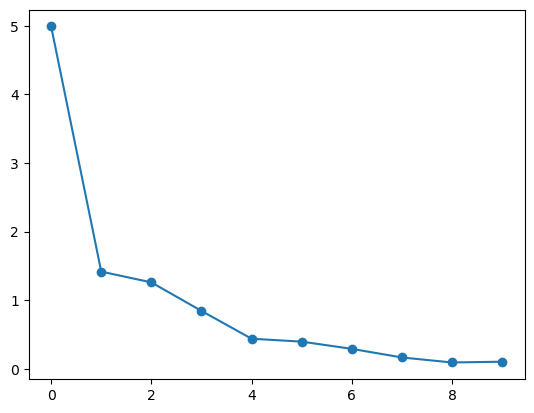

In [109]:
plt.plot(u,marker='o')

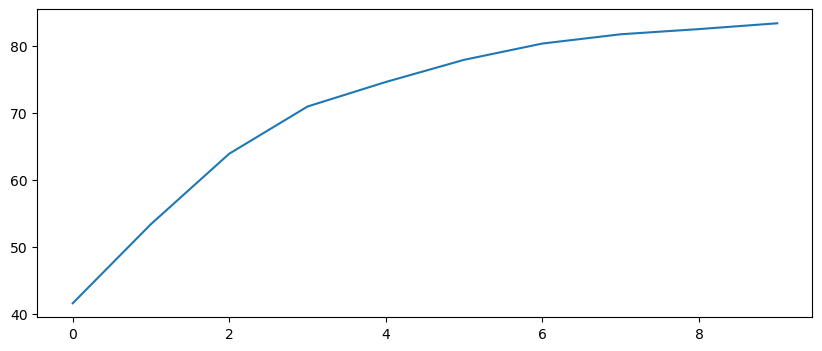

In [110]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,4))
plt.plot(np.cumsum(u)*100/12)
plt.show()

In [111]:
u.sum()

10.0

In [112]:
# checking the percentage of variance contribution of each feature.
(u/u.sum())*100

array([49.89022574, 14.16947213, 12.59984291,  8.4452984 ,  4.39008734,
        3.96590344,  2.91294659,  1.65847588,  0.92749932,  1.04024824])

In [113]:
# Interpretation: 
# (49.89022574+14.16947213+12.59984291+8.4452984) = 85.10483917999998 of the variance is contributed by the first 4 components.

In [114]:
print(A.shape,u.shape,V.shape)

(10, 10) (10,) (10, 10)


In [115]:
cols=['PC'+str(i) for i in range(1,11)]

In [116]:
data_num.head()

,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageCars,GarageArea
0,7,2003,2003,856.0,856,1710,2,8,2.0,548.0
1,6,1976,1976,1262.0,1262,1262,2,6,2.0,460.0
2,7,2001,2002,920.0,920,1786,2,6,2.0,608.0
3,7,1915,1970,756.0,961,1717,1,7,3.0,642.0
4,8,2000,2000,1145.0,1145,2198,2,9,3.0,836.0


In [117]:
P=pd.DataFrame(V,index = data_num.columns,columns = cols)
P

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
OverallQual,0.361588,0.025071,-0.154344,0.093959,-0.172485,0.812264,-0.296535,-0.220230,-0.081612,0.057946
YearBuilt,0.313902,0.333158,-0.305417,0.199736,0.313325,0.129937,0.699228,0.194031,-0.124706,0.011013
YearRemodAdd,0.272721,0.212137,-0.404183,0.372652,-0.608580,-0.430845,-0.136385,-0.030033,0.051789,0.014320
TotalBsmtSF,0.301183,0.222828,0.546739,0.242745,0.055168,-0.007948,0.071481,-0.166293,0.680398,0.054569
1stFlrSF,0.297868,0.101636,0.599223,0.206292,-0.067760,-0.117154,-0.077280,0.115151,-0.671504,-0.104184
GrLivArea,0.320660,-0.517326,0.021467,-0.016848,-0.134168,0.076668,-0.004934,0.745255,0.215204,-0.056435
FullBath,0.325762,-0.214520,-0.233611,0.247467,0.671112,-0.267610,-0.438366,-0.121639,-0.019887,0.051808
TotRmsAbvGrd,0.244720,-0.638443,0.034654,-0.034184,-0.157815,-0.109321,0.442100,-0.534345,-0.086027,0.069984
GarageCars,0.361614,0.157410,-0.071223,-0.538026,0.013540,-0.104420,-0.045070,-0.117953,0.068880,-0.719817
GarageArea,0.342506,0.193287,0.015311,-0.598967,-0.024293,-0.153562,-0.061569,0.048965,-0.048927,0.673484


## Name of the Component:

#### PC1 --> Overall Quality component
#### PC2 --> No of rooms in a house
#### PC3 --> Size of the house in Sqft 
#### PC4 --> GarageSize

#PC1 (Overall quality component):

Features that contribute positively to PC1:

1. OverallQual
2. YearBuilt
3. TotalBsmtSF
4. 1stFlrSF
5. GrLivArea
6. FullBath
7. GarageCars
8. GarageArea

#PC2 (No of rooms in a house ):

Features that contribute positively to PC2: 
1. YearRemodAdd
2. YearBuilt

Features that contribute negatively to PC2:

1. GrLivArea
2. FullBath
3. TotRmsAbvGrd

#PC3 (Size Component):

Features that contribute positively to PC3:
 
1. TotalBsmtSF
2. 1stFlrSF

Features that contribute negatively to PC3:
1. YearRemodAdd
2. GarageCars
3. GarageArea

#PC4 (GarageSize):

Features that contribute positively to PC4:
1. YearRemodAdd
2. TotalBsmtSF
3. 1stFlrSF


Features that contribute negatively to PC4:
1. GarageCars
2. GarageArea 

In [118]:
data_pcs = np.dot(data_scaled,V[:,:4])
data_pcs.shape

(1309, 4)

In [119]:
data_pcs

array([[ 1.57906324, -0.81479712, -1.76323561, -0.01134188],
       [ 0.52618759,  0.38380652,  0.51083533,  0.13703494],
       [ 1.47432172,  0.09897758, -1.5399942 , -0.09431994],
       ...,
       [ 1.16964551, -2.96387584,  0.06149195,  1.67513381],
       [-1.9526178 ,  0.75375928,  0.36016238,  0.99917549],
       [-1.49688402,  0.12871566,  1.47279738,  0.64107616]])

In [120]:
data_pcs.shape

(1309, 4)

In [121]:
data[['PC1','PC2','PC3','PC4']] = data_pcs


In [122]:
data.head(5)

,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageCars,GarageArea,...,Utilities,BldgType,Heating,KitchenQual,SaleCondition,LandSlope,PC1,PC2,PC3,PC4
0,7,2003,2003,856.0,856,1710,2,8,2.0,548.0,...,AllPub,1Fam,GasA,Gd,Normal,Gtl,1.579063,-0.814797,-1.763236,-0.011342
1,6,1976,1976,1262.0,1262,1262,2,6,2.0,460.0,...,AllPub,1Fam,GasA,TA,Normal,Gtl,0.526188,0.383807,0.510835,0.137035
2,7,2001,2002,920.0,920,1786,2,6,2.0,608.0,...,AllPub,1Fam,GasA,Gd,Normal,Gtl,1.474322,0.098978,-1.539994,-0.094320
3,7,1915,1970,756.0,961,1717,1,7,3.0,642.0,...,AllPub,1Fam,GasA,Gd,Abnorml,Gtl,0.098531,-1.009749,0.155644,-2.710167
4,8,2000,2000,1145.0,1145,2198,2,9,3.0,836.0,...,AllPub,1Fam,GasA,Gd,Normal,Gtl,3.906084,-1.146784,-0.811915,-1.311759


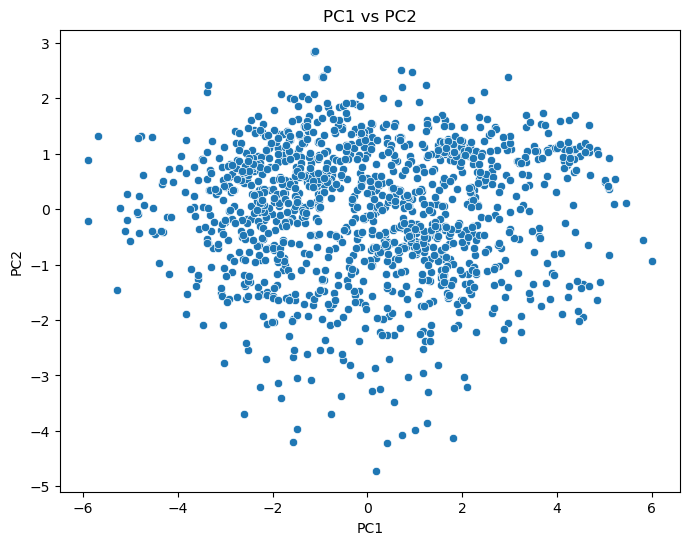

In [132]:
# Scatter Plot for PC1 vs PC2
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x='PC1', y='PC2')
plt.title('PC1 vs PC2')
plt.show()

In [ ]:
# Interpretation:
#1. As the points are scattered that implies the PC1 and PC2 have successfully captured the variations in our data and are independent of each other

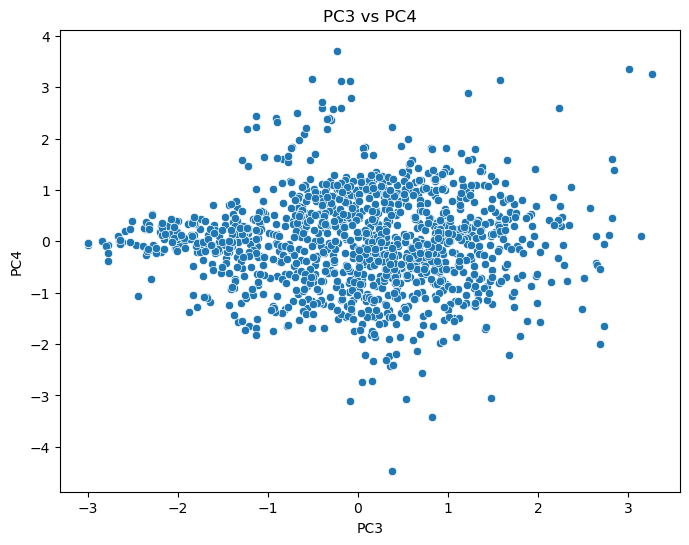

In [124]:
# Scatter Plot for PC3 vs PC4
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x='PC3', y='PC4')
plt.title('PC3 vs PC4')
plt.show()

In [ ]:
# Interpretation:
#1.  As the points are clustered in the middle this implies the PCs have some similarities in higher dimensional space.
#2.Although points are scattered which describes that the PCS have captured the variation in the data.

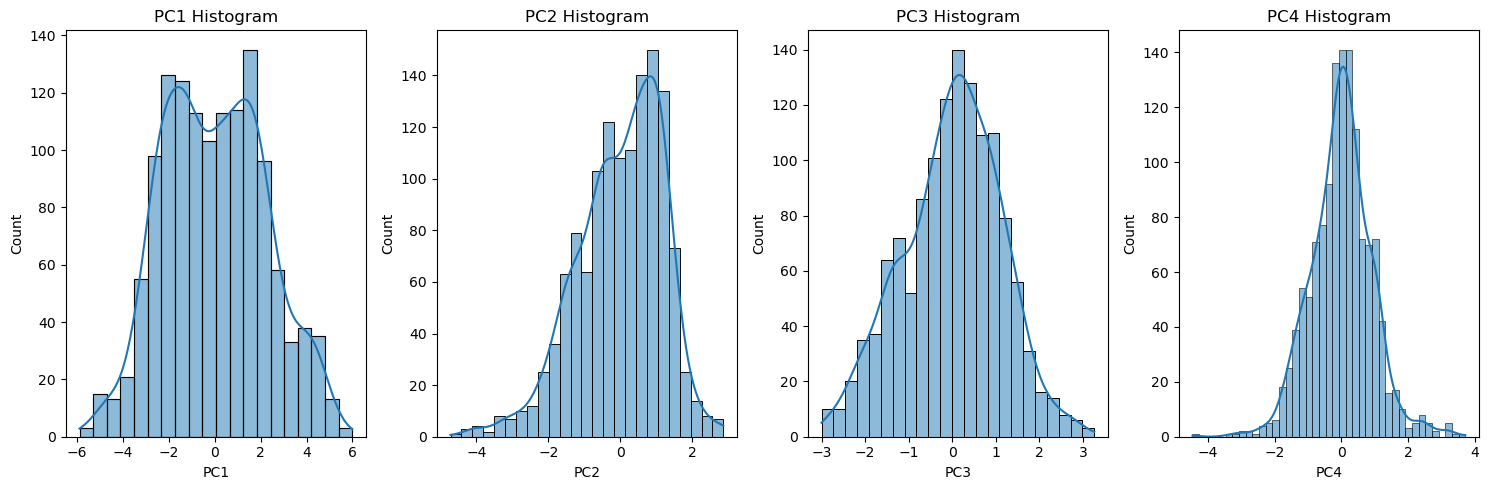

In [125]:
# Histograms for PC1, PC2, PC3, and PC4
plt.figure(figsize=(15, 5))

plt.subplot(1, 4, 1)
sns.histplot(data['PC1'], kde=True)
plt.title('PC1 Histogram')

plt.subplot(1, 4, 2)
sns.histplot(data['PC2'], kde=True)
plt.title('PC2 Histogram')

plt.subplot(1, 4, 3)
sns.histplot(data['PC3'], kde=True)
plt.title('PC3 Histogram')

plt.subplot(1, 4, 4)
sns.histplot(data['PC4'], kde=True)
plt.title('PC4 Histogram')

plt.tight_layout()
plt.show()


### Interpretation:

From the above graph we can see that PC1 captures the most variance in the data, followed by PC2 which captures the second most.


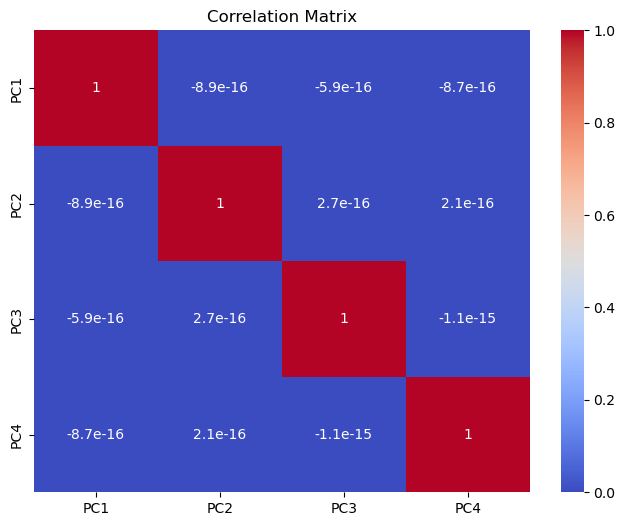

In [127]:
# Correlation Analysis
correlation_matrix = data[['PC1', 'PC2', 'PC3', 'PC4']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


Conclusion:The correlation matrix above affirms that the principal components are orthogonal. This means that each component captures a unique and independent source of variability in the data. 
    It also indicates that the principal components are effectively representing distinct aspects of the dataset. 
    